<a href="https://colab.research.google.com/github/ashishaggarwal1036/Ashish-Aggarwal/blob/main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [73]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [74]:
print(X_train.shape) # this means the data has total 70000 rows of images and 28X28 is the pixel size
print(y_train.shape) # y_Train and y_test contains the value range from 0 to 9.
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [75]:
# to see a single image from the dataset we can use matplotlib library
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

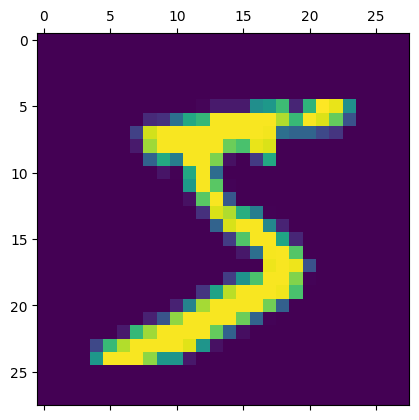

In [76]:
plt.matshow(X_train[0])

In [77]:
# to see the value in y_train
y_train[0]

5

In [78]:
# For model building we need to convert the 2X2 matrix image into 1 dimension using reshape function.

X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [79]:
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [80]:
X_train_flattened

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [81]:
# Model building

model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 9.3744 - accuracy: 0.8420
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 6.1463 - accuracy: 0.8786
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 5.6443 - accuracy: 0.8839
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.5986 - accuracy: 0.8844
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3112 - accuracy: 0.8879


In [82]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 6.1604 - accuracy: 0.8805


[6.16038179397583, 0.8805000185966492]

In [83]:
y_predicted=model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [84]:
y_predicted[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 2.5827527e-16, 0.0000000e+00, 1.0000000e+00,
       9.9999988e-01, 1.0000000e+00], dtype=float32)

In [85]:
np.argmax(y_predicted[2])

1

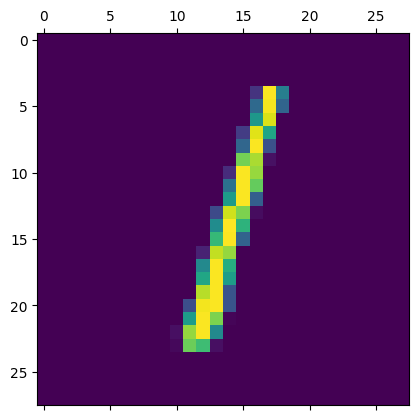

In [86]:
plt.matshow(X_test[2])

In [87]:
y_predicted=[np.argmax(i) for i in y_predicted] ## We need to convert the vectors to the number

In [88]:
y_predicted[0:5]

[3, 0, 1, 0, 4]

In [89]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [90]:
# making confusion maatrix

cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    1,    2,    1,    0,    0,    0,    1,    0],
       [   1, 1128,    3,    0,    0,    3,    0,    0,    0,    0],
       [ 126,  353,  532,    8,    7,    0,    2,    3,    1,    0],
       [ 206,  189,  263,  349,    1,    0,    1,    1,    0,    0],
       [  49,   40,   92,  145,  648,    0,    1,    2,    4,    1],
       [ 196,   28,   99,  296,   79,  190,    2,    1,    1,    0],
       [ 210,   25,  503,   15,   43,   92,   70,    0,    0,    0],
       [  34,   48,  169,  490,   63,   46,    0,  178,    0,    0],
       [  72,  178,  280,  196,   35,  110,    6,   13,   84,    0],
       [  34,   40,  117,  358,  389,    5,    0,   66,    0,    0]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

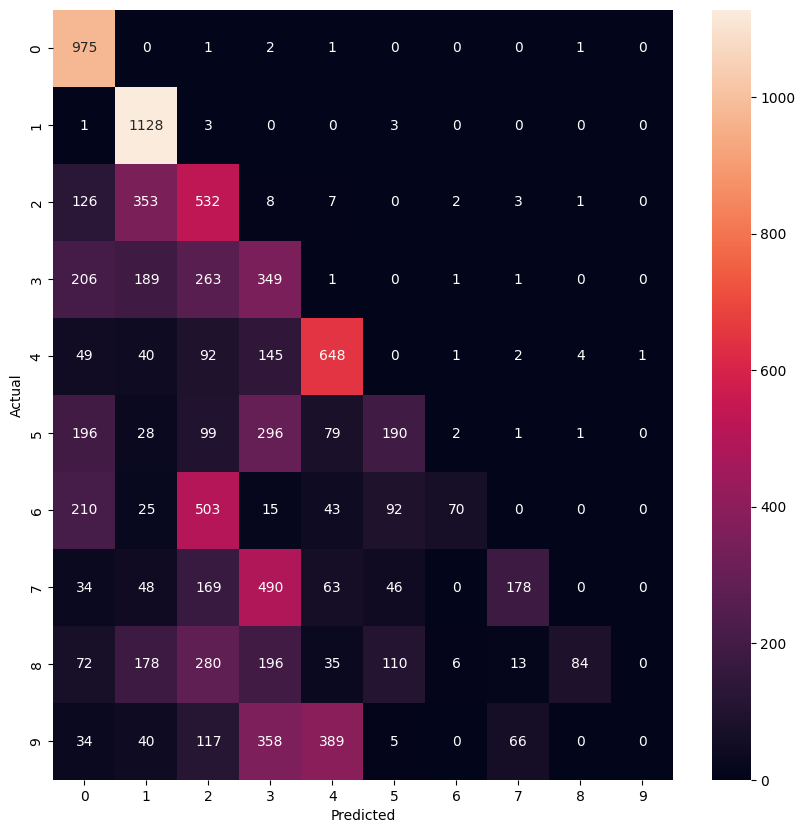

In [91]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [92]:
# We will try the model with a hidden layer

model_1=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid") # in the hidden layer we dont need a input_shape
])

model_1.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model_1.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 2.5833 - accuracy: 0.8456
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4179 - accuracy: 0.9012
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3109 - accuracy: 0.9230
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2699 - accuracy: 0.9321
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2467 - accuracy: 0.9378


In [93]:
model_1.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2573 - accuracy: 0.9419


[0.2572629749774933, 0.9419000148773193]

313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'Actual')

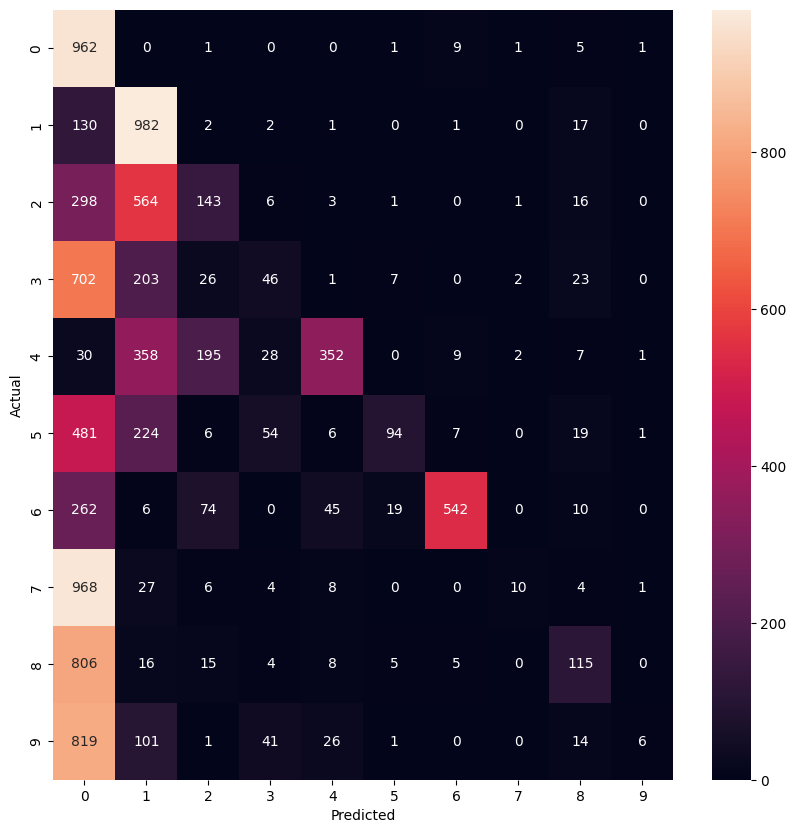

In [94]:
y_predicted_1=model_1.predict(X_test_flattened)
y_predicted_1=[np.argmax(i) for i in y_predicted_1]
cm_1=tf.math.confusion_matrix(y_test,y_predicted_1)

plt.figure(figsize=(10,10))
sns.heatmap(cm_1,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")